## Abstract Vector Spaces and their applications
There is an algebraic structure known as a vector space. A vector space is a set of elements that can be added together and multiplied by scalars(There are actually a few more axioms but this mostly describes it). Often when taught vectors we think of them as arrows in space but actually everything that satisfies these conditions are vectors. Strangely even functions can be considered vectors.
  
Often within more traditional linear algebra, we will project vectors onto subspaces for data compression purposes. This is not limited to vectors in space but can actually be applied within any vector space. All we need is some function we want to project and a basis for the subspace we want to project onto. 
  
When projecting some vector $f$ onto a subspace $S$ it will result in a vector $p$ such that $f-p$ is orthogonal to $S$. We know that two vectors are orthogonal if their inner product is zero. The inner product of two function vectors is defined as $\langle f,g \rangle = \int_a^b f(x)g(x)dx$.
  
Because $f-p$ is orthogonal to all basis vectors of $S$, we know that for all $v \in S$ we need $\langle f-p, v\rangle=0$. Because $p$ is a vector in $S$ we can rewrite it as a linear combination of the basis vectors of $S$ such that $p=a_1v_1+...a_nv_n$. By properties of the dot product we can rewrite $\langle f-p, v\rangle=0$ as $\langle f,v \rangle-\langle p,v \rangle =0$ and by properties of $p$ being a vector in $S$ we can rewrite this as $\langle f,v \rangle - a_1\langle v_1,v \rangle-...-a_n\langle v_n,v \rangle=0$. By creating one of these equations for every basis vector in $S$ we can create a matrix to solve for the $a$'s.
  
By doing this process it has allowed us to find the linear combinition of a set of given functions that best approximates another function.

## Code Implementation of Projection
The following code has a function that is an abstract implemention of vector projection. It should work for any vector space. It works by the user defining the vector they want projected and the basis of the subspace they want to project onto. They then define the inner product of the vector space and specify any arguments needed for the inner product. Note that the inner product must take arguments as a parameter even if it doesn't need them, to prevent errors. 

In [533]:
import numpy as np
from scipy.integrate import quad

def inner_product_func(f,g, args):
    return quad(lambda x: f(x)*g(x), args[0], args[1])[0]


def vector_projection(f, basis,inner_product, inner_product_args = None):
    def create_coefficent_matrix(basis,inner_product, inner_product_args = None):
        n = len(basis)
        A = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                A[i][j] = inner_product(basis[i], basis[j], inner_product_args)
        return A
    
    def create_vector_to_solve(f, basis, inner_product, inner_product_args = None):
        n = len(basis)
        vec = np.zeros(n)
        for i in range(n):
            vec[i] = inner_product(f, basis[i], inner_product_args)
        return vec
    
    vec_to_solve = create_vector_to_solve(f, basis, inner_product, inner_product_args)
    A = create_coefficent_matrix(basis, inner_product, inner_product_args)

    x = np.linalg.solve(A, vec_to_solve)
    return x

Now we are going to use our function to project a function onto a subspace. We are projecting the function of $f(x)=sin(x)$ onto a basis of degree 5 polynomials or less on the interval $[0,2\pi]$. We will then plot the original function and the projection. Notice how nicely the projection fits the original function. 

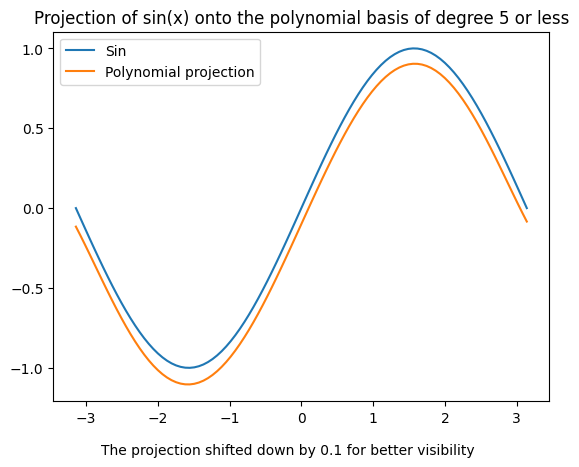

In [534]:
def create_function(coefficents, basis):
    return lambda x: sum([coefficents[i]*basis[i](x) for i in range(len(coefficents))])

degree = 5
basis = [lambda x, p=p: x**p for p in range(degree+1)]
f = np.sin

x = vector_projection(f, basis, inner_product_func, inner_product_args=[-np.pi, np.pi])

f_aprox = create_function(x, basis)

import matplotlib.pyplot as plt
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)
plt.plot(x,y, label='Sin')
y = [f_aprox(i)-0.1 for i in x]
plt.plot(x,y, label='Polynomial projection')
plt.title(f'Projection of sin(x) onto the polynomial basis of degree {degree} or less')
plt.figtext(0.2, 0, 'The projection shifted down by 0.1 for better visibility')
plt.legend()
plt.show()


## Fourier Transformation
The Fourier Transformation is a way to create a periodogram of a function. This can be thought of as a function which takes another function from the time domain to the frequency domain. Normally the equation for a fourier transformation is $\hat{f}(w)=\int_{-\infty}^{\infty} f(t)e^{-iwt}dt$. But according to Euler's Formula we can represent any sinusoidal function as $e^{iwt}$ because $e^{iwt}=\text{cos}(wt)+i\text{sin}(wt)$. 
  
So to avoid dealing with complex integration, instead of projecting our function onto a basis of $e^{iwt}$ we can project it onto a basis of $\text{cos}(wt)$ and $\text{sin}(wt)$. We can then recombine these into a single wave later on using derivations from Euler's Formula. 
  
Through the following code we will analyzing the function $f(x)=\text{sin}(3x+1)+\text{sin}(5x-2)$ and projecting it onto the basis of $\text{cos}(wt)$ and $\text{sin}(wt)$ with various different frequencies.

In [535]:
basis = []
for i in range(10):
    basis.append(lambda x, i=i: np.cos((i+1)*x))
    basis.append(lambda x, i=i: np.sin((i+1)*x))
f = lambda x: 4*np.sin(3*x+1)+4*np.sin(5*x-2)

coeffiecents = vector_projection(f, basis, inner_product_func, inner_product_args=[-np.pi, np.pi])
print(coeffiecents)
f_aprox = create_function(coeffiecents, basis)


[ 6.04897706e-17  2.80347750e-16 -2.44272936e-16 -3.67402052e-16
  3.36588394e+00  2.16120922e+00 -8.73792473e-16  3.29208583e-16
 -3.63718971e+00 -1.66458735e+00  2.99834632e-16 -3.45579693e-16
 -2.67972834e-17  3.03994814e-16  1.17105521e-15 -2.59280579e-16
  1.39330646e-15  5.35171141e-16 -2.93093684e-15  1.15451080e-15]


Now lets graph the function projected onto a basis of $\text{cos}(wt)$ and $\text{sin}(wt)$ and compare it to the original function. Notice how it nicely approximates the original function. But if we were to write this out as a linear combination of $\text{cos}(wt)$ and $\text{sin}(wt)$ we would get a really long function. This is because to account for the phase shifts each wave with a given frequency is represented a linear combination of $\text{cos}(wt)$ and $\text{sin}(wt)$.
Dropping the close to zero coefficents this tells us that the function is approximately $3.36\text{cos}(3x)+2.161\text{sin}(3x)-3.637\text{cos}(5x)-1.664\text{sin}(5x)$

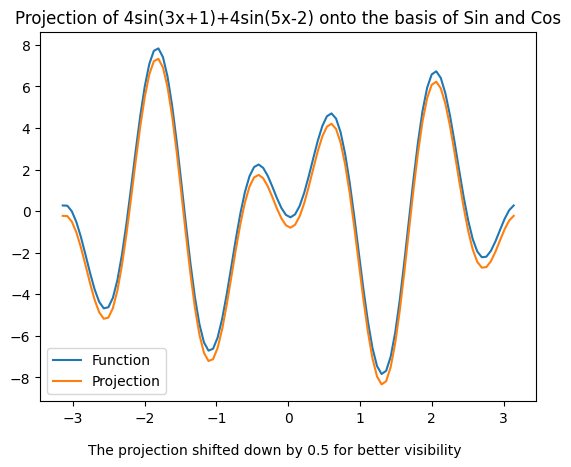

In [536]:
x = np.linspace(-np.pi,np.pi,100)
y = f(x)
plt.plot(x,y, label='Function')
y = [f_aprox(i)-0.5 for i in x]
plt.plot(x,y, label='Projection')
plt.title(f'Projection of 4sin(3x+1)+4sin(5x-2) onto the basis of Sin and Cos')
plt.figtext(0.2, 0, 'The projection shifted down by 0.5 for better visibility')
plt.legend()

But what if we wanted to break it down into the individual waves that compose it, rather than a linear combination of $\text{cos}(wt)$ and $\text{sin}(wt)$. We can use the formula $A \text{sin}(wt+\phi)=a_1\text{cos}(wt) + a_2\text{sin}(wt)$ where $A=\sqrt{a_1^2+a_2^2}$ and $\phi=\text{tan}^{-1}(\frac{a_2}{a_1})$. This will give us the amplitude and phase of the individual waves that compose the function. 

In [537]:
def find_phase(coeff1, coeff2):
    return np.arctan2(coeff1,coeff2)

def find_amplitude(coeff1, coeff2):
    return np.sqrt(coeff1**2 + coeff2**2)

def compress_singular_wave(coeffiecents):
    n = len(coeffiecents)
    amplitude_phases = []
    for i in range(0,n,2):
        amplitude = find_amplitude(coeffiecents[i], coeffiecents[i+1])
        phase = find_phase(coeffiecents[i], coeffiecents[i+1])
        amplitude_phases.append((amplitude, phase))
    return amplitude_phases

def create_waves_from_amplitude_phase(amplitude_phases):
    waves = []
    for i in range(len(amplitude_phases)):
        waves.append(lambda x, i=i: amplitude_phases[i][0] * np.sin((i+1) * x + amplitude_phases[i][1]))
    return waves


amplitude_phases = compress_singular_wave(coeffiecents)
waves = create_waves_from_amplitude_phase(amplitude_phases)


After finding the individual waves that compose the function we can graph them to see how well they line up with the original function. Notice how when they are in alignment the function is at a peak and when they are out of alignment the function is at a trough.

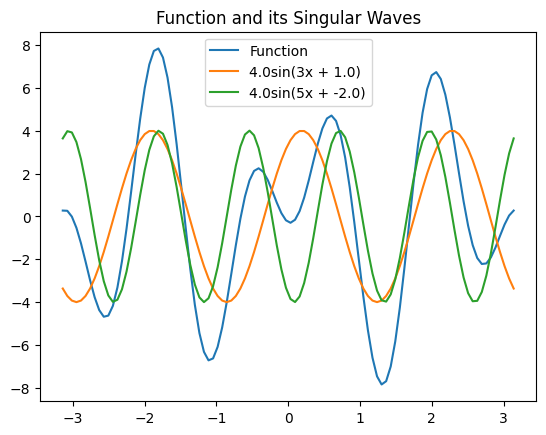

In [538]:
x = np.linspace(-np.pi,np.pi,100)
y = f(x)
plt.plot(x,y, label='Function')
for i in range(len(amplitude_phases)):
    if amplitude_phases[i][0] < 0.1:
        continue
    y = waves[i](x)
    plt.plot(x,y, label=f'{amplitude_phases[i][0]:.1f}sin({i+1}x + {amplitude_phases[i][1]:.1f})')
plt.title('Function and its Singular Waves')
plt.legend()

Now if we compose the individual waves back together we get the original function. This shows us that we have successfully broken down the function into its individual waves and then recombined them to get the original function. If we wanted to we could actually remove some of the waves to get a simpler function. 

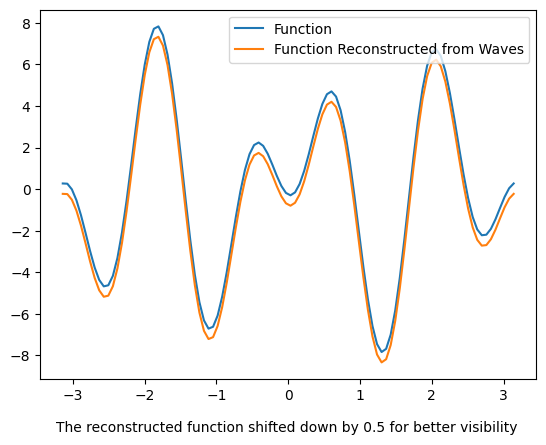

In [539]:
def create_wave_from_waves(waves):
    def wave(x):
        y = 0
        for i in range(len(waves)):
            y += waves[i](x)
        return y
    return wave
wave = create_wave_from_waves(waves)

#graph wave and function
x = np.linspace(-np.pi,np.pi,100)
y = f(x)
plt.plot(x,y, label='Function')
plt.plot(x,wave(x)-0.5, label='Function Reconstructed from Waves')
plt.figtext(0.15, 0, 'The reconstructed function shifted down by 0.5 for better visibility')
plt.legend()

## Removing Noise Via Fourier Transformation
Often in the real world we will have some signal that has a few underlying waves but also has some noise. We can do this using a fourier transformation. By converting a signal into its singular waves, we can remove the waves with an amplitude close to zero. This removes the noise and leaves us only with the primary waves that compose the signal. The example of this would be making an audio file clearer by removing the background noise, we only care about the primary waves(likely the voice) and not the noise.

For the first step we simply break down our noisey signal into its individual waves. Notice how the two largest waves are the actual waves of our function with the rest being a result of the noise. One of our waves amplitude is incorrect because of the noise, if we were to have a longer period of time we are seeing the signal it would likely become more accurate. 

[-0.16269305 -0.14053858  0.05498024  0.09759976  3.10918722  2.27201883
 -0.06713838 -0.09940858 -3.82243088 -1.57467494  0.00723466 -0.16398723
  0.0184233   0.09695684 -0.0683485  -0.05672543  0.11256341 -0.06463194
  0.18882421  0.0275676 ]


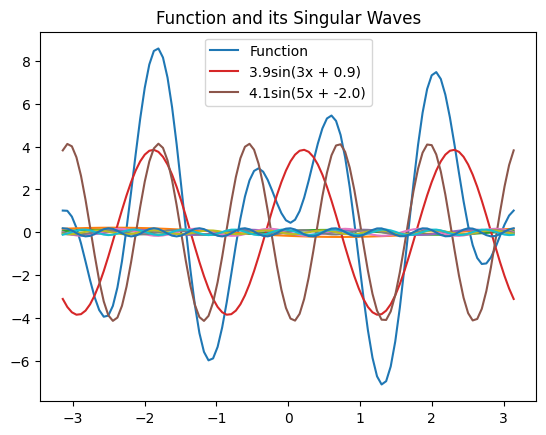

In [540]:
import random
import warnings
warnings.filterwarnings("ignore")
random.seed(0)

basis = []
for i in range(10):
    basis.append(lambda x, i=i: np.cos((i+1)*x))
    basis.append(lambda x, i=i: np.sin((i+1)*x))

def noisy_signal(x):
    return 4*np.sin((3*x)+1)+4*np.sin((5*x)-2) + np.random.normal(0,1.3)

coeffiecents = vector_projection(noisy_signal, basis, inner_product_func, inner_product_args=[-np.pi, np.pi])
print(coeffiecents)
f_aprox = create_function(coeffiecents, basis)

amplitude_phases = compress_singular_wave(coeffiecents)
waves = create_waves_from_amplitude_phase(amplitude_phases)

x = np.linspace(-np.pi,np.pi,100)
y = noisy_signal(x)
plt.plot(x,y, label='Function')
for i in range(len(amplitude_phases)):
    y = waves[i](x)
    if amplitude_phases[i][0] < 1:
        plt.plot(x,y)
    else:
        plt.plot(x,y, label=f'{amplitude_phases[i][0]:.1f}sin({i+1}x + {amplitude_phases[i][1]:.1f})')
plt.title('Function and its Singular Waves')
plt.legend()

Now to remove the waves that are not important we can simply set the amplitudes of the small waves to zero. This will remove the noise and leave us with the primary waves that compose the signal.

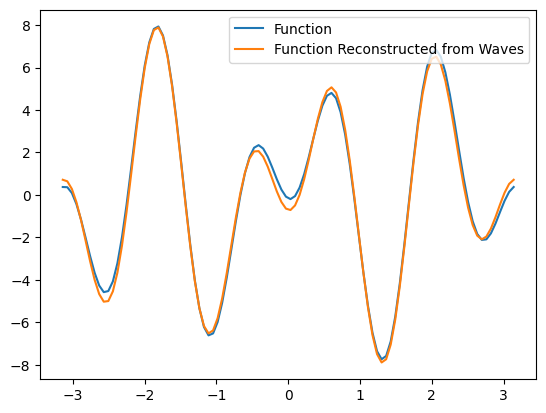

In [541]:
#set the amplitude of waves with amplitude less than 1 to 0
for i in range(len(amplitude_phases)):
    if amplitude_phases[i][0] < 1:
        amplitude_phases[i] = (0,0)

waves = create_waves_from_amplitude_phase(amplitude_phases)
wave = create_wave_from_waves(waves)

#graph wave and function
x = np.linspace(-np.pi,np.pi,100)
y = noisy_signal(x)
plt.plot(x,y, label='Function')
plt.plot(x,wave(x), label='Function Reconstructed from Waves')
plt.legend()
plt.show()

## Approximating multi-variable functions with projections
We have seen projection of functions with only one input variable, but this can be extended to functions with multiple input variables as well. We can do this simmilarly to how we did it with only one input, but instead of using $\langle f,g \rangle = \int_a^b f(x)g(x)dx$ as the inner product we instead use $\langle f, g \rangle = \int_{a}^{b} \int_{b}^{c} \int_{c}^{a} f(x,y,z) g(x,y,z) \, \partial x \, \partial y \, \partial z$. But before we project the function, lets take a look at the function first. Not that we are only going to be approximating this function from $x=0$ to $x=5$, $y=0$ to $y=5$, and $z=0$ to $z=5$.

In [542]:
import numpy as np
import plotly.graph_objects as go

#Grid
x = np.linspace(0, 5, 30)
y = np.linspace(0, 5, 30)
z = np.linspace(0, 5, 30)

#function to plot
def f(x, y, z):
    return 1.5*np.sin(x)+np.cos(y)+0.5*np.sin(z)


def plot_3d_function(x, y, z, func, name):
    X, Y, Z = np.meshgrid(x, y, z)
    
    T = func(X, Y, Z)
    
    fig = go.Figure(data=go.Volume(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        value=T.flatten(),
        isomin=T.min(),
        isomax=T.max(),
        opacity=0.3,  
        surface_count=20, 
        colorscale="Viridis"
    ))

    fig.update_layout(
        title=name,
        scene=dict(
            xaxis_title="X Value",
            yaxis_title="Y Value",
            zaxis_title="Z Value"
        )
    )
    fig.show()

# Call the function to plot the 3D function
plot_3d_function(x, y, z, f, 'Function 1.5sin(x)+cos(y)+0.5sin(z)')

Now that we have created the function that we want to project onto a new basis. We program a function that represents our inner product, and because of the way we coded our vector projection function in the beginning we are now ready to project our function. To generate a basis for the subspace we want to project onto we generate a bunch of simple monic polynomial functions. For example $x^5$, $y^2$ and $z^3$ would be some basis vectors within the subpspace of degree 5 polynomials. We then measure the difference between the original function and the projected function using the Mean Squared Error. $MSE = \int_{x_1}^{x_2} \left( \int_{y_1}^{y_2} \left( \int_{z_1}^{z_2} \left( f(x, y, z) - g(x, y, z) \right)^2 \, dz \right) dy \right) dx$. Notice how in the output below that as we add more basis vectors to the subspace the error decreases.

In [543]:
inner_product_args = [[0, 5], [0, 5], [0, 5]]

def inner_product_func(f, g, args):
    # Nested integrals to compute the 3D inner product
    return quad(lambda x: quad(lambda y: quad(lambda z: f(x, y, z) * g(x, y, z), args[2][0], args[2][1])[0], args[1][0], args[1][1])[0], args[0][0], args[0][1])[0]

def generate_monics(max_n):
    functions = []
    for i in range(3):
        for a in range(1,max_n):
            def f(x,y,z, i=i, a=a):
                if i == 0:
                    return x**a
                elif i == 1:
                    return y**a
                else:
                    return z**a
            functions.append(f)
    return functions

def create_3d_function(coefficients, basis):
    def f(x, y, z):
        return sum([coefficients[i] * basis[i](x, y, z) for i in range(len(coefficients))])
    return f

def mean_squared_error(f, g):
    return quad(lambda x: quad(lambda y: quad(lambda z: (f(x, y, z) - g(x, y, z))**2, inner_product_args[2][0], inner_product_args[2][1])[0], inner_product_args[1][0], inner_product_args[1][1])[0], inner_product_args[0][0], inner_product_args[0][1])[0]

for i in range(1,10):
    basis = generate_monics(i)
    coefficients = vector_projection(f, basis, inner_product_func, inner_product_args=inner_product_args)
    f_aprox = create_3d_function(coefficients, basis)
    print(f'Mean Squared Error for degree {i}: {mean_squared_error(f, f_aprox)}')

Mean Squared Error for degree 1: 213.96047251423371
Mean Squared Error for degree 2: 186.34549036431827
Mean Squared Error for degree 3: 47.44975204252688
Mean Squared Error for degree 4: 3.240698750858754
Mean Squared Error for degree 5: 1.3518961490515986
Mean Squared Error for degree 6: 1.221259413409383
Mean Squared Error for degree 7: 0.8758079679423003
Mean Squared Error for degree 8: 0.6573023894601118
Mean Squared Error for degree 9: 0.518463372535949


Now we are going to graph the original function minus the projected function with the least error. This will show us how well the function was approximated by the subspace. Notice how small the difference is. 

In [544]:
error_function = lambda x, y, z: f(x, y, z) - f_aprox(x, y, z)
plot_3d_function(x, y, z, error_function, 'Error Between Function and Approximation')

## Conclusion
Now that we have looked at how function projection is useful in approximating functions, you might be wondering the applications of this. The most obvious is signal detection using Fourier Transformations. Often astronomers will examine a stars brightness over time and use a Fourier Transformation to find the waves of dimming and brightening created by exoplanets. 
  
The less obvious application of function projection would be use within distributed computing. If you have some complicated function that is computationally expensive to calculate, you could project it onto a subspace of simpler functions. Due to the nature of the linear combintion you would get from the projection, you could distribute the basis functions to different computers and then recombine them to get the original function. This process is not lossless so you would have to be careful about the basis functions you choose.

## Future Plans 
In the future I plan on working with some change of basis to transform the function in the basis into an orthogonal basis. This would massively speed up computation time as the matrix that we need to solve would be diagonal. This would allow us to solve the matrix in $O(n)$ time rather than $O(n^3)$ time. 
  
Additionally because the matrix to solve only changes when you change the basis, not with each function you project, we could store the matrix and reuse it for multiple functions. Additionally we could dynamically grow the matrix as we add more basis functions to also save time, as when you add a new basis function you only need to add a new row to the bottom and a new column to the right. 
  
I would like to automate the process of finding good basis functions for the subspace. I will have to research more on how to do this but I think either some form of machine learning or algebraic geometry using varieties. 